金融时间序列分析 第三版 Ruey S. Tsay著
https://github.com/strengthening/AFTS

In [1]:
# !pip install moment
# !mkdir -p ./chapter1/text/
# !wget https://github.com/strengthening/AFTS/raw/master/chapter1/text/d-ibm3dx7008.txt -O ./chapter1/text/d-ibm3dx7008.txt
# !head ./chapter1/text/d-ibm3dx7008.txt

In [2]:
import pandas as pd
import math
import moment

df = pd.read_table("./chapter1/text/d-ibm3dx7008.txt")

In [3]:
print(df.head(10))

       Date       rtn    vwretd    ewretd    sprtrn
0  19700102  0.000686  0.012137  0.033450  0.010211
1  19700105  0.009596  0.006375  0.018947  0.004946
2  19700106  0.000679 -0.007233 -0.005776 -0.006848
3  19700107  0.000678 -0.001272  0.003559 -0.002047
4  19700108  0.002034  0.000564  0.002890  0.000540
5  19700109 -0.001353 -0.002797 -0.002923 -0.003021
6  19700112 -0.003388 -0.007766 -0.009646 -0.007576
7  19700113  0.017335  0.000737 -0.001090  0.000981
8  19700114 -0.001002 -0.002005 -0.005280 -0.001525
9  19700115  0.020736  0.000586 -0.002182  0.000327


In [4]:
df.columns = df.columns.map(lambda x :x.strip()) # 去掉字段名存在的空格
print(df.columns)

Index(['Date', 'rtn', 'vwretd', 'ewretd', 'sprtrn'], dtype='object')


In [5]:
df['Date'] = df['Date'].apply( lambda x : moment.date( str(x) ,'YYYYMMDD').date)

In [7]:
print(df.head(2))

        Date       rtn    vwretd    ewretd    sprtrn
0 1970-01-02  0.000686  0.012137  0.033450  0.010211
1 1970-01-05  0.009596  0.006375  0.018947  0.004946


In [12]:
df = df.set_index(df['Date'])
print(df.head(2))
print(df.shape  )#数据集行数 列数
print(df.head(1)) # 数据集的第一行
print(df.tail(1)) # 数据集的最后一行 
ibm = df['rtn']
print(ibm.head(2))
sibm = ibm * 100
print(sibm.head(2))

                 Date       rtn    vwretd    ewretd    sprtrn
Date                                                         
1970-01-02 1970-01-02  0.000686  0.012137  0.033450  0.010211
1970-01-05 1970-01-05  0.009596  0.006375  0.018947  0.004946
(9845, 5)
                 Date       rtn    vwretd   ewretd    sprtrn
Date                                                        
1970-01-02 1970-01-02  0.000686  0.012137  0.03345  0.010211
                 Date       rtn    vwretd    ewretd    sprtrn
Date                                                         
2008-12-31 2008-12-31  0.007301  0.017513  0.036731  0.014158
Date
1970-01-02    0.000686
1970-01-05    0.009596
Name: rtn, dtype: float64
Date
1970-01-02    0.0686
1970-01-05    0.9596
Name: rtn, dtype: float64


In [13]:
print( sibm.mean()     )  #均值
print( sibm.median()   )  #中位数
print( sibm.sum()      )  #和
print( sibm.var()      )  #方差
print( sibm.std()      )  #标准差
print( sibm.skew()     )  # 偏度
print( sibm.kurtosis() )  # 超额峰度

0.04016125952260035
0.0
395.3876000000004
2.864705476857398
1.692544084169567
0.0614174915169
9.92463294122


Populating the interactive namespace from numpy and matplotlib


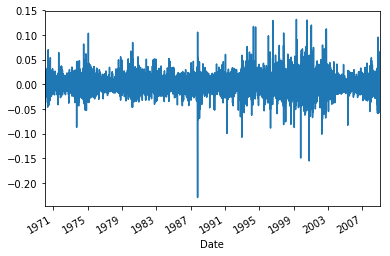

In [15]:
%pylab inline 
df['rtn'].plot() #IBM股票日收益率折线图

In [23]:
print(df['rtn'].head(4))
print(df['rtn'].resample('M').sum().head(4))

Date
1970-01-02    0.000686
1970-01-05    0.009596
1970-01-06    0.000679
1970-01-07    0.000678
Name: rtn, dtype: float64
Date
1970-01-31   -0.080667
1970-02-28    0.019645
1970-03-31   -0.003446
1970-04-30   -0.124477
Freq: M, Name: rtn, dtype: float64


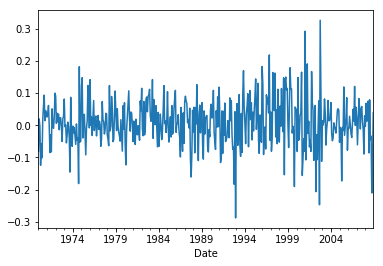

In [16]:
df['rtn'].resample('M').sum().plot()

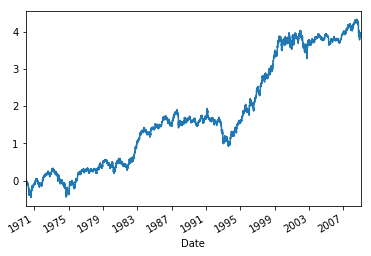

In [24]:
df['rtn'].cumsum().plot() #IBM股票日累计收益率折线图

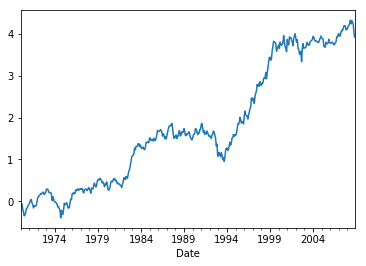

In [25]:
df['rtn'].resample('M').sum().cumsum().plot() #IBM股票月累计收益率折线图